In [3]:
#根据longley数据集来预测结果GNP.deflator(平减指数)
#观察数据有六个特征
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [4]:
#读入数据
data = np.genfromtxt("longley.csv",delimiter = ',')
print(data)  #字符串

[[     nan      nan      nan      nan      nan      nan      nan      nan]
 [     nan   83.     234.289  235.6    159.     107.608 1947.      60.323]
 [     nan   88.5    259.426  232.5    145.6    108.632 1948.      61.122]
 [     nan   88.2    258.054  368.2    161.6    109.773 1949.      60.171]
 [     nan   89.5    284.599  335.1    165.     110.929 1950.      61.187]
 [     nan   96.2    328.975  209.9    309.9    112.075 1951.      63.221]
 [     nan   98.1    346.999  193.2    359.4    113.27  1952.      63.639]
 [     nan   99.     365.385  187.     354.7    115.094 1953.      64.989]
 [     nan  100.     363.112  357.8    335.     116.219 1954.      63.761]
 [     nan  101.2    397.469  290.4    304.8    117.388 1955.      66.019]
 [     nan  104.6    419.18   282.2    285.7    118.734 1956.      67.857]
 [     nan  108.4    442.769  293.6    279.8    120.445 1957.      68.169]
 [     nan  110.8    444.546  468.1    263.7    121.95  1958.      66.513]
 [     nan  112.6    482.

In [5]:
#切分数据
x_data = data[1:,2:]
y_data = data[1:,1]
print(x_data)
print(y_data)

[[ 234.289  235.6    159.     107.608 1947.      60.323]
 [ 259.426  232.5    145.6    108.632 1948.      61.122]
 [ 258.054  368.2    161.6    109.773 1949.      60.171]
 [ 284.599  335.1    165.     110.929 1950.      61.187]
 [ 328.975  209.9    309.9    112.075 1951.      63.221]
 [ 346.999  193.2    359.4    113.27  1952.      63.639]
 [ 365.385  187.     354.7    115.094 1953.      64.989]
 [ 363.112  357.8    335.     116.219 1954.      63.761]
 [ 397.469  290.4    304.8    117.388 1955.      66.019]
 [ 419.18   282.2    285.7    118.734 1956.      67.857]
 [ 442.769  293.6    279.8    120.445 1957.      68.169]
 [ 444.546  468.1    263.7    121.95  1958.      66.513]
 [ 482.704  381.3    255.2    123.366 1959.      68.655]
 [ 502.601  393.1    251.4    125.368 1960.      69.564]
 [ 518.173  480.6    257.2    127.852 1961.      69.331]
 [ 554.894  400.7    282.7    130.081 1962.      70.551]]
[ 83.   88.5  88.2  89.5  96.2  98.1  99.  100.  101.2 104.6 108.4 110.8
 112.6 114.2 1

In [13]:
#考虑岭回归模型
#生成50个值
alpha_test = np.linspace(0.001,1)  #默认50个值(从0.001到1的系数)
print(alpha_test)  #
#创建模型
#把上面生成的50个数传入这个岭回归模型，交叉验证法会测试这50个值
model = linear_model.RidgeCV(alphas = alpha_test,store_cv_values=True)  #CV代表交叉验证;保存结果
model.fit(x_data,y_data)

#岭系数
#这里就会判断50个系数里哪一个比较好，最好的岭系数进行打印
print(model.alpha_)
#loss
print(model.cv_values_.shape)  #116行的交叉验证，50列岭系数，该矩阵就全是loss值了

[0.001      0.02138776 0.04177551 0.06216327 0.08255102 0.10293878
 0.12332653 0.14371429 0.16410204 0.1844898  0.20487755 0.22526531
 0.24565306 0.26604082 0.28642857 0.30681633 0.32720408 0.34759184
 0.36797959 0.38836735 0.4087551  0.42914286 0.44953061 0.46991837
 0.49030612 0.51069388 0.53108163 0.55146939 0.57185714 0.5922449
 0.61263265 0.63302041 0.65340816 0.67379592 0.69418367 0.71457143
 0.73495918 0.75534694 0.77573469 0.79612245 0.8165102  0.83689796
 0.85728571 0.87767347 0.89806122 0.91844898 0.93883673 0.95922449
 0.97961224 1.        ]
0.40875510204081633
(16, 50)


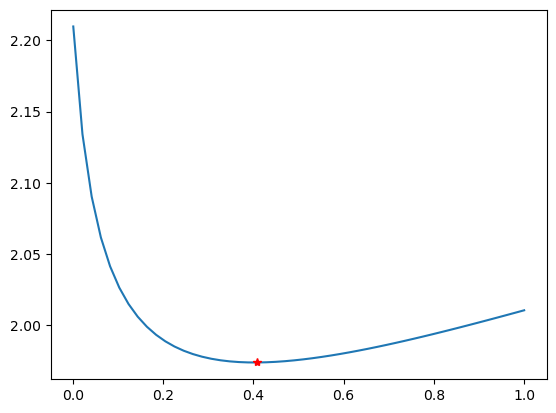

In [14]:
#画出岭系数与loss值的关系图
plt.plot(alpha_test,model.cv_values_.mean(axis=0))  #这50个岭系数对应的loss值的平均值
#选取岭系数的位置(最低点：使得交叉验证的loss值最低)
plt.plot(model.alpha_,min(model.cv_values_.mean(axis=0)),'r*')
plt.show()

In [17]:
#可以进行验证，就把原始数据集的第2个样本进行传入，让该模型进行预测结果
#x_data[1,np.newaxis]  即就是传入第二个样本，第二个样本的真是结果（GNP平减）是88.5
model.predict(x_data[1,np.newaxis])

array([86.92050262])